In [4]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

In [5]:
data = pd.read_csv('investing_program_prediction_data.csv')

### Справка о данных:
Данные были созданы в рамках проекта по изучению данных, чтобы спрогнозировать, какую инвестиционную программу предложить клиенту банка. Банк счел очень полезным заранее спрогнозировать тип инвестиционной программы, а не пытаться предлагать оба продукта конкретному клиенту. Проект был проведен много лет назад, большинство современных методов и алгоритмов тогда были недоступны.

### Описание входных данных:

SE1 - Возраст, 
SE2 - Географическое местоположение клиента (G0 означает отсутствие доступного местоположения)

BA1 – BA7 – Банковская деятельность, денежный эквивалент для общих операций на банковском счете клиента в прошлом году, т. е. сумма платежей за возврат кредита

PE1 – PE15 – История инвестирования (банковский продукт)

IA1 – IA3 – Инвестиционная деятельность, учитывающая различные виды операций по инвестиционным счетам в прошлом году.


In [6]:
data

,SE1,SE2,BA1,BA2,BA3,BA4,BA5,BA6,BA7,PE1,...,PE10,PE11,PE12,PE13,PE14,PE15,IA1,IA2,IA3,InvType
0,45,G29,12,0.0,5934,0,0,0,0,I0,...,I0,I0,I0,I0,I0,I0,0,0,1,C1
1,41,G0,0,0.0,21514,316374,5142,0,5141,I0,...,I0,I0,I1,I1,I1,I0,0,0,1,C1
2,43,G0,1,0.0,14324,22344,22344,0,22344,I0,...,I0,I0,I0,I0,I0,I0,0,0,0,C1
3,36,G52,16,0.0,41114,2406838,1156219,692875,41425,I0,...,I1,I1,I1,I1,I0,I0,0,0,0,C1
4,2,G10,0,0.0,2394,621,621,0,621,I0,...,I0,I0,I0,I0,I0,I0,0,0,0,C1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4729,57,G23,1,0.0,12514,14274,14274,0,14274,I0,...,I0,I0,I0,I0,I0,I0,0,0,0,C0
4730,34,G66,0,0.0,5994,1036,1036,0,1036,I0,...,I0,I0,I0,I0,I0,I0,0,0,0,C1
4731,44,G51,19,0.0,69627,4805913,3345950,1899126,596537,I0,...,I1,I1,I1,I1,I1,I0,0,0,1,C1
4732,22,G0,0,0.0,5999,0,0,0,0,I0,...,I0,I0,I0,I0,I0,I0,0,0,0,C1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4734 entries, 0 to 4733
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SE1      4734 non-null   int64  
 1   SE2      4734 non-null   object 
 2   BA1      4734 non-null   int64  
 3   BA2      4734 non-null   float64
 4   BA3      4734 non-null   int64  
 5   BA4      4734 non-null   int64  
 6   BA5      4734 non-null   int64  
 7   BA6      4734 non-null   int64  
 8   BA7      4734 non-null   int64  
 9   PE1      4734 non-null   object 
 10  PE2      4734 non-null   object 
 11  PE3      4734 non-null   object 
 12  PE4      4734 non-null   object 
 13  PE5      4734 non-null   object 
 14  PE6      4734 non-null   object 
 15  PE7      4734 non-null   object 
 16  PE8      4734 non-null   object 
 17  PE9      4734 non-null   object 
 18  PE10     4734 non-null   object 
 19  PE11     4734 non-null   object 
 20  PE12     4734 non-null   object 
 21  PE13     4734 

В наших данных нет пропусков. Можно в этом убедится еще одним способом, с помощью простой команды:

In [8]:
data.isna().sum().sum()

0

Посмотрим как распределен возраст клиентов:

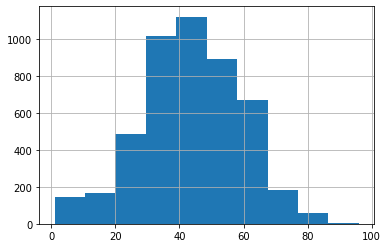

In [12]:
data['SE1'].hist()

In [14]:
data.describe()

,SE1,BA1,BA2,BA3,BA4,BA5,BA6,BA7,IA1,IA2,IA3
count,4734.000000,4734.000000,4734.000000,4.734000e+03,4.734000e+03,4.734000e+03,4.734000e+03,4.734000e+03,4734.000000,4734.000000,4734.000000
mean,43.465357,4.853612,707.814911,8.648174e+04,5.353285e+05,2.647640e+05,1.332180e+05,9.522675e+04,0.011618,0.000634,0.427123
std,15.646703,7.477688,9620.039964,2.100368e+05,1.167569e+06,6.642276e+05,4.816864e+05,2.308034e+05,0.394972,0.043602,0.830991
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,0.000000,0.000000,9.237250e+03,6.550250e+03,5.589500e+03,0.000000e+00,3.668000e+03,0.000000,0.000000,0.000000
50%,43.000000,1.000000,0.000000,2.616450e+04,7.373750e+04,5.401150e+04,0.000000e+00,2.404400e+04,0.000000,0.000000,0.000000
75%,55.000000,7.000000,0.000000,8.255700e+04,5.576665e+05,2.771580e+05,5.119850e+04,9.624475e+04,0.000000,0.000000,1.000000
max,96.000000,106.000000,341698.220000,4.459345e+06,3.332942e+07,2.881915e+07,1.125846e+07,4.739885e+06,26.000000,3.000000,9.000000


### Предобработка данных:

In [26]:
def preprocessing_data(df):
    
    df = df.copy()
    
    
    # Убераем категориальные объекты в PE фичах
    for col in ['PE' + str(i) for i in range(1, 16)]:
        df[col] = df[col].apply(lambda x: x[1]).astype(np.int) # I0 --> 0, I1 --> 1.
        
    # One-hot encode столбца SE2 (небольшое, конечное количество вариантов)
    geo_dum = pd.get_dummies(df['SE2'])
    df = pd.concat([df, geo_dum], axis=1)
    df = df.drop('SE2', axis=1) 
    
    # обработка признака "возраст"
    df['Young'] = df['SE1'].apply(lambda x: 1 if x < 18 else 0)
    df['Old'] = df['SE1'].apply(lambda x: 1 if x > 63 else 0)
    
    
    # Обработка BA фич 
    for col in ['BA' + str(i) for i in range(1, 8)]:
        df['Low' + col] = df[col].apply(lambda x: 1 if x <= df[col].quantile(0.25) else 0)
        
        
    y = df['InvType']
    X = df.drop('InvType', axis = 1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, shuffle = True, random_state = 1)
    
    # Стандартизируем X
    scal = StandardScaler()
    scal.fit(X_train)
    X_train = pd.DataFrame(scal.transform(X_train), columns = X.columns)
    X_test = pd.DataFrame(scal.transform(X_test), columns = X.columns)
    
    return X_train, X_test, y_train, y_test
    

In [27]:
X_train, X_test, y_train, y_test = preprocessing_data(data)

In [28]:
X_train.head(5)

,SE1,BA1,BA2,BA3,BA4,BA5,BA6,BA7,PE1,PE2,...,G99,Young,Old,LowBA1,LowBA2,LowBA3,LowBA4,LowBA5,LowBA6,LowBA7
0,-0.853711,-0.507149,-0.0665,-0.429064,-0.029207,0.343929,-0.281583,-0.391727,-0.235439,-0.057718,...,-0.092323,-0.252118,-0.325281,-0.876824,0.113314,1.743630,-0.571657,-0.571657,0.644366,1.726838
1,-1.359483,-0.638075,-0.0665,-0.014772,-0.417519,-0.309869,-0.281583,-0.192492,-0.235439,-0.057718,...,-0.092323,-0.252118,-0.325281,1.140480,0.113314,-0.573516,-0.571657,-0.571657,0.644366,-0.579093
2,0.347499,-0.638075,-0.0665,-0.391779,-0.272048,-0.064940,-0.281583,0.523943,-0.235439,-0.057718,...,-0.092323,-0.252118,-0.325281,1.140480,0.113314,-0.573516,-0.571657,-0.571657,0.644366,-0.579093
3,0.537164,-0.638075,-0.0665,-0.194794,-0.413902,-0.303780,-0.281583,-0.174679,-0.235439,-0.057718,...,-0.092323,-0.252118,-0.325281,1.140480,0.113314,-0.573516,-0.571657,-0.571657,0.644366,-0.579093
4,0.284278,0.409339,-0.0665,-0.209624,1.256704,1.374897,1.642699,0.777796,-0.235439,-0.057718,...,-0.092323,-0.252118,-0.325281,-0.876824,0.113314,-0.573516,-0.571657,-0.571657,-1.551914,-0.579093


In [29]:
y_train.head(5)

4146    C1
3152    C1
4227    C1
3287    C0
3444    C1
Name: InvType, dtype: object

Воспользуемся логистической регрессией для прогноза инвестиционной программы

In [31]:
model = LogisticRegression()
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)

In [34]:
print("Показатель accuracy: {: .2f}%".format(accuracy * 100))

Показатель accuracy:  71.15%
